In [1]:
import numpy as np
import pandas as pd
from matplotlib import rc
import matplotlib.pyplot as plt
import itertools
import warnings
from matplotlib import rcParams
rcParams['font.family'] = 'helvetica'
path = 'crop/crop_production.csv'
plt.rcParams.update({'font.size': 20})

In [2]:
crop = pd.read_csv(path)
crop.Season = crop.Season.apply(lambda s: s.rstrip())
crop.Crop = crop.Crop.apply(lambda s: s.rstrip())
crop.Season.unique()

array(['Kharif', 'Whole Year', 'Autumn', 'Rabi', 'Summer', 'Winter'],
      dtype=object)

In [7]:
crop

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


In [3]:
crop_names = crop.Crop.unique()
crop_names

array(['Arecanut', 'Other Kharif pulses', 'Rice', 'Banana', 'Cashewnut',
       'Coconut', 'Dry ginger', 'Sugarcane', 'Sweet potato', 'Tapioca',
       'Black pepper', 'Dry chillies', 'other oilseeds', 'Turmeric',
       'Maize', 'Moong(Green Gram)', 'Urad', 'Arhar/Tur', 'Groundnut',
       'Sunflower', 'Bajra', 'Castor seed', 'Cotton(lint)', 'Horse-gram',
       'Jowar', 'Korra', 'Ragi', 'Tobacco', 'Gram', 'Wheat', 'Masoor',
       'Sesamum', 'Linseed', 'Safflower', 'Onion', 'other misc. pulses',
       'Samai', 'Small millets', 'Coriander', 'Potato',
       'Other  Rabi pulses', 'Soyabean', 'Beans & Mutter(Vegetable)',
       'Bhindi', 'Brinjal', 'Citrus Fruit', 'Cucumber', 'Grapes', 'Mango',
       'Orange', 'other fibres', 'Other Fresh Fruits', 'Other Vegetables',
       'Papaya', 'Pome Fruit', 'Tomato', 'Rapeseed &Mustard', 'Mesta',
       'Cowpea(Lobia)', 'Lemon', 'Pome Granet', 'Sapota', 'Cabbage',
       'Peas  (vegetable)', 'Niger seed', 'Bottle Gourd', 'Sannhamp',
       'Var

In [8]:
kharif_total = crop.loc[(crop.Crop_Year == 2014) & (crop.Season == 'Kharif')]

In [9]:
kharif_total

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
927,Andhra Pradesh,ANANTAPUR,2014,Kharif,Arhar/Tur,37562.0,4845.0
928,Andhra Pradesh,ANANTAPUR,2014,Kharif,Bajra,1752.0,1028.0
929,Andhra Pradesh,ANANTAPUR,2014,Kharif,Brinjal,320.0,7596.0
930,Andhra Pradesh,ANANTAPUR,2014,Kharif,Cabbage,10.0,123.0
931,Andhra Pradesh,ANANTAPUR,2014,Kharif,Cashewnut,19.0,7.0
...,...,...,...,...,...,...,...
246066,West Bengal,PURULIA,2014,Kharif,Other Kharif pulses,79.0,39.0
246067,West Bengal,PURULIA,2014,Kharif,Sannhamp,171.0,727.0
246068,West Bengal,PURULIA,2014,Kharif,Soyabean,18.0,7.0
246069,West Bengal,PURULIA,2014,Kharif,Sunflower,46.0,42.0


In [4]:
year = sorted(crop.Crop_Year.unique())
annual_crop = []
kharif = []
rabi = []
other = []
rice = []
wheat = []
grain = []
for yr in year[:-1]:
    annual_total = crop.loc[crop.Crop_Year == yr]
    kharif_total = crop.loc[(crop.Crop_Year == yr) & (crop.Season == 'Kharif')]
    rabi_total = crop.loc[(crop.Crop_Year == yr) & (crop.Season == 'Rabi')]
    rice_total = annual_total.loc[annual_total.Crop.isin(['Rice','Paddy'])]
    wheat_total = crop.loc[(crop.Crop_Year == yr) & (crop.Crop == 'Wheat')]
    other_total = annual_total.loc[annual_total.Season.isin(['Summer', 'Winter'])]
    grain_total = annual_total.loc[annual_total.Crop.isin([
        'Other Kharif pulses',
        'other misc. pulses',
        'Other  Rabi pulses',
        'Peas & beans (Pulses)',
        'Pulses total',
        'Small millets',
        'Bajra',
        'Other Cereals & Millets',
        'Maize',
        'Barley'])]
    # Convert total to crop in MMT
    annual_crop.append(annual_total.Production.sum()/1e+6)
    kharif.append(kharif_total.Production.sum()/1e+6)
    rabi.append(rabi_total.Production.sum()/1e+6)
    other.append(other_total.Production.sum()/1e+6)
    rice.append(rice_total.Production.sum()/1e+6)
    wheat.append(wheat_total.Production.sum()/1e+6)
    grain.append(grain_total.Production.sum()/1e+6)
    
    

In [18]:
annual_crop

[851.232906,
 5825.320640399999,
 6434.6659851,
 7449.7091271,
 7465.54084027,
 7696.955162640001,
 7917.97350473,
 8189.46169486,
 8043.7573297399995,
 8681.913123780001,
 6879.442338580001,
 7717.018402160001,
 7660.494024809999,
 6307.608525369999,
 14308.90408713,
 8171.0547460299995,
 12903.58863288,
 8664.540631110001]

In [17]:
np.array([kharif,rabi,other]).sum(axis=0)

array([287.268986  , 287.246989  , 243.4845996 , 227.7796921 ,
       245.61650506, 214.13355084, 261.41637542, 377.00546451,
       427.677305  , 413.51965669, 402.52767214, 465.27621944,
       454.02764861, 556.4016387 , 465.23758476, 470.63677703,
       470.80891678, 410.3942328 ])

In [9]:
bar1 = np.array(rice)
bar2 = np.array(rice)  + np.array(wheat) + np.array(grain)

In [11]:
bar1 = np.array(kharif)
bar2 = np.array(rabi)
bar3 = np.array(other) 
bar1/(bar1+bar2+bar3)


array([0.48136182, 0.56063449, 0.45499823, 0.50152246, 0.51995739,
       0.45136219, 0.52898577, 0.63645044, 0.68055831, 0.63250073,
       0.62733368, 0.65134084, 0.65037962, 0.65654965, 0.59789173,
       0.60759097, 0.63553849, 0.65990902])

/Users/ruoyulan/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  # This is added back by InteractiveShellApp.init_path()


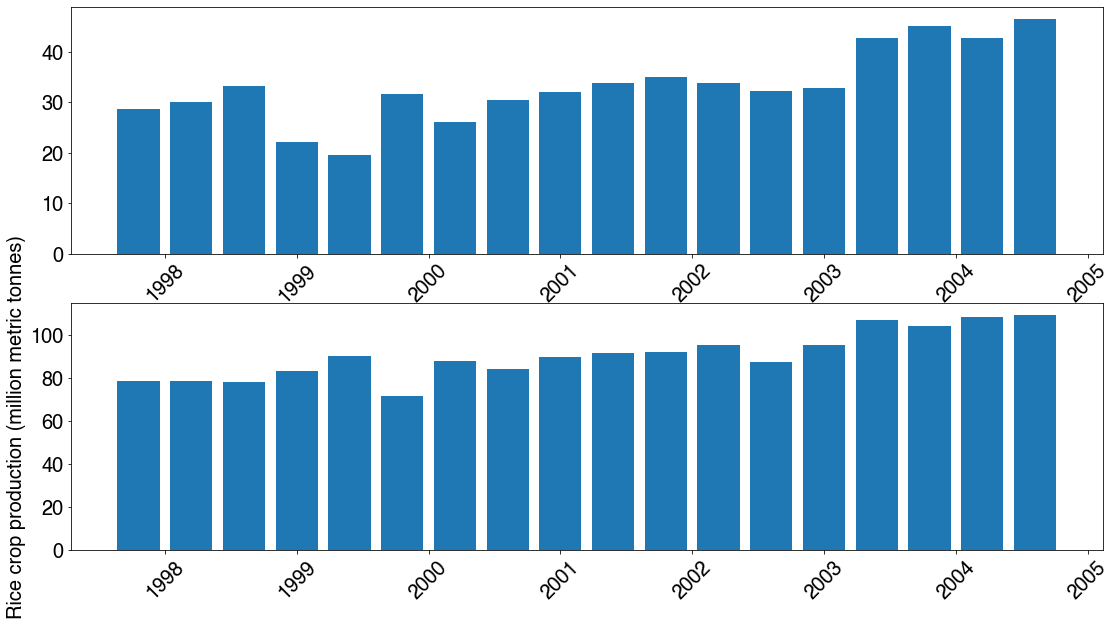

In [229]:
#all crop production
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.bar(year[:-1],other)
#ax1.set(ylabel = 'Other crops production (million metric tonnes)')
ax1.set_xticklabels(year[:-1], rotation=45)

ax2.bar(year[:-1],rice)
ax2.set(ylabel = 'Rice crop production (million metric tonnes)')
ax2.set_xticklabels(year[:-1], rotation=45)

plt.tight_layout()
fig.set_size_inches(18.5, 10)

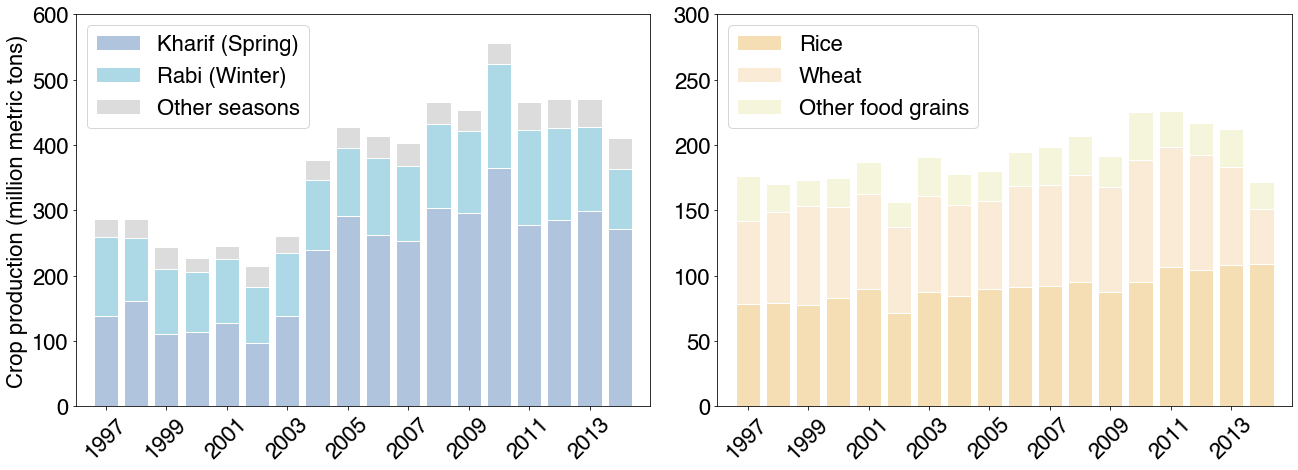

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2)
# Creat bars
bar1 = np.array(kharif)
bar2 = np.array(rabi)
bar3 = np.array(other) 
years = year[:-1]
barWidth = 0.8

# Heights of bars1 + bars2
bars12 = np.add(bar1, bar2).tolist()

# Create brown bars(1), bottom
ax1.bar(years, bar1, color='lightsteelblue', edgecolor='white', width=barWidth, label='Kharif (Spring)')
# Create green bars (2), on top of the firs ones
ax1.bar(years, bar2, bottom=bar1, color='lightblue', edgecolor='white', width=barWidth, label='Rabi (Winter)')
# Create green bars (3), top
ax1.bar(years, bar3, bottom=bars12, color='gainsboro', edgecolor='white', width=barWidth, label='Other seasons')

# Custom XY axis
ax1.set_xticks(years[::2])
ax1.set_xticklabels(years[::2], rotation=45)
ax1.set(ylabel = 'Crop production (million metric tons)')
ax1.set_xlim([years[0]-1, years[-1]+1])
ax1.set_ylim([0, 600])
# Show graphic
ax1.legend()
plt.rcParams.update({'font.size': 22})
# Creat barsr
bar1 = np.array(rice)
bar2 = np.array(wheat)
bar3 = np.array(grain) 
years = year[:-1]
barWidth = 0.8

# Heights of bars1 + bars2
bars12 = np.add(bar1, bar2).tolist()

# Create brown bars(1), bottom
ax2.bar(years, bar1, color='wheat', edgecolor='white', width=barWidth, label='Rice')
# Create green bars (2), on top of the firs ones
ax2.bar(years, bar2, bottom=bar1, color='antiquewhite', edgecolor='white', width=barWidth, label='Wheat')
# Create green bars (3), top
ax2.bar(years, bar3, bottom=bars12, color='beige', edgecolor='white', width=barWidth, label='Other food grains')

# Custom XY axis
ax2.set_xticks(years[::2])
ax2.set_xticklabels(years[::2], rotation=45)
ax2.set_xlim([years[0]-1, years[-1]+1])
ax2.set_ylim([0, 300])
plt.rcParams.update({'font.size': 22})
# Show graphic
ax2.legend()
# Adjust figure
fig.set_size_inches(18.5, 7)
plt.tight_layout()
plt.show()

In [9]:
fig.savefig('/Users/ruoyulan/Desktop/crop.png', dpi=600)

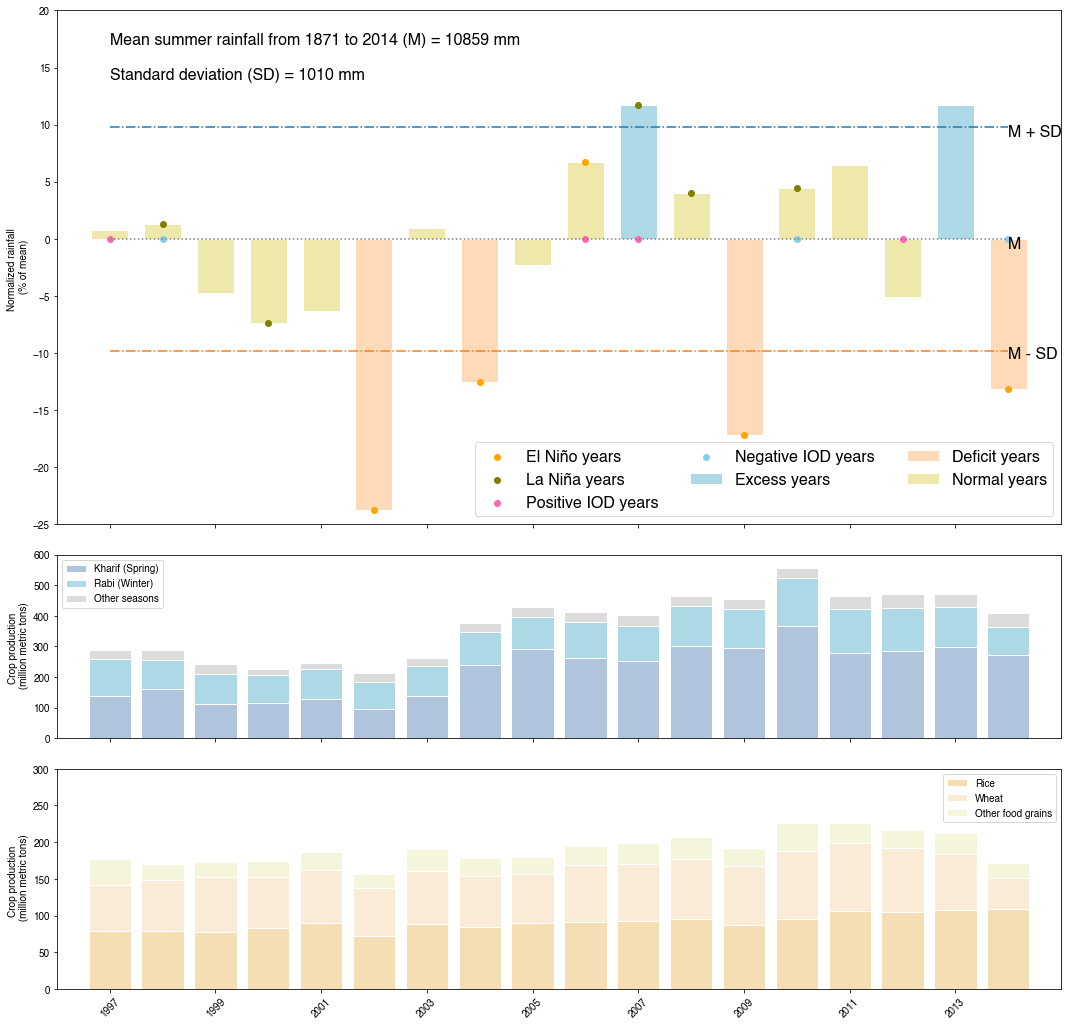

In [10]:
annual_rainfall = np.array([11466,11562,10757,9917,10575,8561,10780,10009,11091,11509,11602,11001,9273,11706,10789,9943,12291,9590])
summer_rainfall = np.array([8545,8592,8078,7858,7944,6468,8561,7417,8285,9052,9471,8822,7020,8857,9029,8051,9473,7364])

fig, (ax3, ax1, ax2) = plt.subplots(3, 1, gridspec_kw=dict(width_ratios=[1], height_ratios=[0.7, 0.25, 0.30]))
# Creat bars
bar1 = np.array(kharif)
bar2 = np.array(rabi)
bar3 = np.array(other) 
years = year[:-1]
barWidth = 0.8

# Heights of bars1 + bars2
bars12 = np.add(bar1, bar2).tolist()

# Create brown bars(1), bottom
ax1.bar(years, bar1, color='lightsteelblue', edgecolor='white', width=barWidth, label='Kharif (Spring)')
# Create green bars (2), on top of the firs ones
ax1.bar(years, bar2, bottom=bar1, color='lightblue', edgecolor='white', width=barWidth, label='Rabi (Winter)')
# Create green bars (3), top
ax1.bar(years, bar3, bottom=bars12, color='gainsboro', edgecolor='white', width=barWidth, label='Other seasons')

# Custom XY axis
ax1.set_xticks(years[::2])
ax1.set_xticklabels([])
ax1.set(ylabel = 'Crop production \n (million metric tons)')
ax1.set_xlim([years[0]-1, years[-1]+1])
ax1.set_ylim([0, 600])
# Show graphic
ax1.legend()

# Creat bars
bar1 = np.array(rice)
bar2 = np.array(wheat)
bar3 = np.array(grain) 
years = year[:-1]
barWidth = 0.8

# Heights of bars1 + bars2
bars12 = np.add(bar1, bar2).tolist()

# Create brown bars(1), bottom
ax2.bar(years, bar1, color='wheat', edgecolor='white', width=barWidth, label='Rice')
# Create green bars (2), on top of the firs ones
ax2.bar(years, bar2, bottom=bar1, color='antiquewhite', edgecolor='white', width=barWidth, label='Wheat')
# Create green bars (3), top
ax2.bar(years, bar3, bottom=bars12, color='beige', edgecolor='white', width=barWidth, label='Other food grains')

# Custom XY axis
ax2.set_xticks(years[::2])
ax2.set_xticklabels(years[::2], rotation=45)
ax2.set_xlim([years[0]-1, years[-1]+1])
ax2.set_ylim([0, 300])
ax2.set(ylabel = 'Crop production \n (million metric tons)')
# Show graphic
ax2.legend()

grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)
# Calculate summer rainfall 
summer_rainfall = np.array([8545,8592,8078,7858,7944,6468,8561,7417,8285,9052,9471,8822,7020,8857,9029,8051,9473,7364])
summer_norm = (summer_rainfall - 8481)/8481*100
summer_std = 831/8481*100
years = np.array(year[:-1])
barWidth = 0.7

# Select excess, deficit, and normal years of rainfall
idx = summer_norm > summer_std
ax3.bar(years[idx], summer_norm[idx], color='lightblue', edgecolor='white', width=barWidth, label='Excess years')
idx = summer_norm < -summer_std
ax3.bar(years[idx], summer_norm[idx], color='peachpuff', edgecolor='white', width=barWidth, label='Deficit years')
idx = (-summer_std <= summer_norm) & (summer_norm <= summer_std)
ax3.bar(years[idx], summer_norm[idx], color='palegoldenrod', edgecolor='white', width=barWidth, label='Normal years')

# Plot bars
ax3.set_xticks(years[::2])
ax3.set_xticklabels([])
ax3.set_ylabel('Normalized rainfall \n (% of mean)')
line = summer_std*np.ones(18)
ax3.plot(years, line, linestyle= '-.')
ax3.plot(years, -line, linestyle= '-.')
ax3.plot(years, 0*line, linestyle= ':', color='grey')
ax3.set_xlim([years[0]-1, years[-1]+1])
ax3.set_ylim([-25, 20])
ax3.text(1997, 17, 'Mean summer rainfall from 1871 to 2014 (M) = 10859 mm', fontsize=16)
ax3.text(1997, 14, 'Standard deviation (SD) = 1010 mm', fontsize=16)
ax3.text(2014, 9, 'M + SD', fontsize=16)
ax3.text(2014, -0.8, 'M', fontsize=16)
ax3.text(2014, -10.5, 'M - SD', fontsize=16)
ax3.margins(0.2)
# Plot El Niño and La Niña years
summer_rain_series = pd.Series(dict(zip(years, summer_norm)))
el_nino_rain = summer_rain_series.loc[[2002,2004,2006,2009,2014]]
ax3.scatter(el_nino_rain.index, 
             el_nino_rain, 
             c='orange',
             zorder=2,
             label= 'El Niño years')
la_nina_rain = summer_rain_series.loc[[1998,2000,2007,2008,2010]]
ax3.scatter(la_nina_rain.index, 
             la_nina_rain,
             c='olive',
             zorder=2,
             label='La Niña years')

p_iod_rain = summer_rain_series.loc[[1997,2006,2007, 2012]]
ax3.scatter(p_iod_rain.index, 
             0*p_iod_rain,
             c='hotpink',
             zorder=2,
             label='Positive IOD years')

n_iod_rain = summer_rain_series.loc[[1998,2010,2014]]
ax3.scatter(n_iod_rain.index, 
             0*n_iod_rain,
             c='skyblue',
             zorder=2,
             label='Negative IOD years')

# Show legend
ax3.legend(loc='lower right', fontsize=16, ncol=3)

plt.subplots_adjust(hspace=0.1)
fig.set_size_inches(18, 18)
plt.savefig('/Users/ruoyulan/Desktop/climate_crop.png', dpi=600)
plt.show()







In [519]:
summer_rain_series = pd.Series(dict(zip(years, summer_rainfall)))

In [439]:
el_nino_rain = summer_rain_dict.loc[[2002,2004,2006,2009,2014]]

In [481]:
summer_norm

array([  0.75462799,   1.30880792,  -4.75179814,  -7.34583186,
        -6.3318005 , -23.73540856,   0.94328499, -12.54569037,
        -2.31104823,   6.73269662,  11.67315175,   4.02075227,
       -17.22674213,   4.43343945,   6.46150218,  -5.07015682,
        11.69673388, -13.17061667])

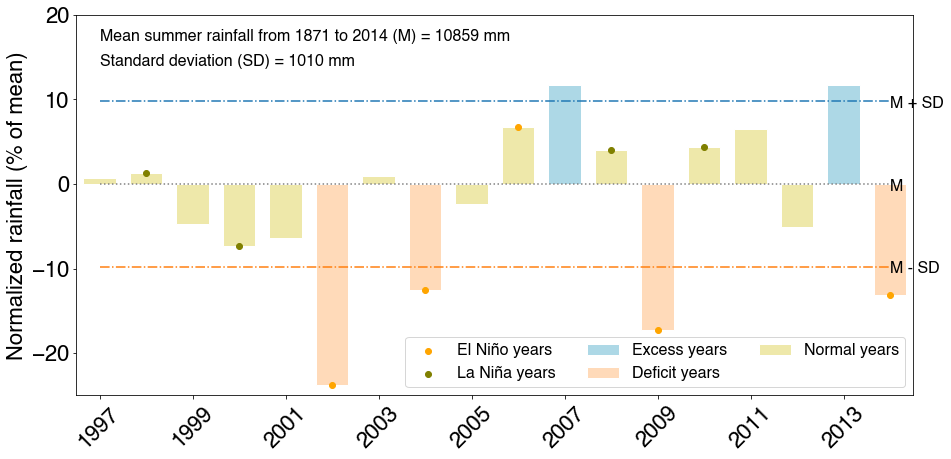

In [10]:
summer_rainfall = np.array([8545,8592,8078,7858,7944,6468,8561,7417,8285,9052,9471,8822,7020,8857,9029,8051,9473,7364])

plt.figure(figsize=(15, 7))
summer_norm = (summer_rainfall - 8481)/8481*100
summer_std = 831/8481*100
years = np.array(year[:-1])
barWidth = 0.7

idx = summer_norm > summer_std
plt.bar(years[idx], summer_norm[idx], color='lightblue', edgecolor='white', width=barWidth, label='Excess years')
idx = summer_norm < -summer_std
plt.bar(years[idx], summer_norm[idx], color='peachpuff', edgecolor='white', width=barWidth, label='Deficit years')
idx = (-summer_std <= summer_norm) & (summer_norm <= summer_std)
plt.bar(years[idx], summer_norm[idx], color='palegoldenrod', edgecolor='white', width=barWidth, label='Normal years')

plt.xticks(years[::2], rotation=45)
plt.ylabel('Normalized rainfall (% of mean)')
line = summer_std*np.ones(18)
plt.plot(years, line, linestyle= '-.')
plt.plot(years, -line, linestyle= '-.')
plt.plot(years, 0*line, linestyle= ':', color='grey')
plt.xlim([years[0]-0.5, years[-1]+0.5])
plt.ylim([-25, 20])
plt.text(1997, 17, 'Mean summer rainfall from 1871 to 2014 (M) = 10859 mm', fontsize=16)
plt.text(1997, 14, 'Standard deviation (SD) = 1010 mm', fontsize=16)
plt.text(2014, 9, 'M + SD', fontsize=16)
plt.text(2014, -0.8, 'M', fontsize=16)
plt.text(2014, -10.5, 'M - SD', fontsize=16)
plt.margins(0.2)

summer_rain_series = pd.Series(dict(zip(years, summer_norm)))
el_nino_rain = summer_rain_series.loc[[2002,2004,2006,2009,2014]]
plt.scatter(el_nino_rain.index, 
             el_nino_rain, 
             c='orange',
             zorder=2,
             label= 'El Niño years')
la_nina_rain = summer_rain_series.loc[[1998,2000,2008,2010]]
plt.scatter(la_nina_rain.index, 
             la_nina_rain,
             c='olive',
             zorder=2,
             label='La Niña years')

plt.legend(loc='lower right', fontsize=16, ncol=3)
plt.savefig('/Users/ruoyulan/Desktop/climate.png', dpi=600)
plt.show()